In [ ]:
import pandas as pd

# Load the datasets
yelp_data = pd.read_csv("yelp_academic_dataset_business.csv", on_bad_lines="skip")
population_data = pd.read_csv("population_by_zip_2010.csv")  # Replace with the actual filename

# Merge datasets on postal_code/zipcode
merged_data = pd.merge(
    yelp_data,
    population_data,
    left_on="postal_code",
    right_on="zipcode",
    how="inner"
)

In [ ]:
# Calculate competition level (number of businesses per zip code)
merged_data["competition"] = merged_data.groupby("postal_code")["business_id"].transform("count")

# Calculate average ratings and competition for each zip code
analysis = merged_data.groupby("zipcode").agg(
    avg_rating=("stars", "mean"),
    competition=("competition", "mean"),
    population=("population", "mean")
).reset_index()

# Define bins (adjust based on distribution)
bins = [0, 516, 1105, 1862, 4801]  # Example thresholds
labels = ["Very Low Density", "Low Density", "Medium Density", "High Density"]
analysis["density_category"] = pd.cut(analysis["population"], bins=bins, labels=labels)

# Calculate average ratings for each density category
density_analysis = analysis.groupby("density_category").agg(
    avg_rating=("avg_rating", "mean"),
    avg_competition=("competition", "mean"),
    avg_population=("population", "mean")
).reset_index()

# Output the analysis
print("Average ratings by density category:")
print(density_analysis)

# Save the analysis for visualization
#density_analysis.to_csv("density_analysis.csv", index=False)


Average ratings by density category:
   density_category  avg_rating  avg_competition  avg_population
0  Very Low Density    3.643132      2020.593750      233.679118
1       Low Density    3.539921      6217.952790      829.034510
2    Medium Density    3.535804      9209.055794     1463.100026
3      High Density    3.472859     12765.337607     2520.646782


<ipython-input-9-f4e6ef1a78a0>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  density_analysis = analysis.groupby("density_category").agg(


In [ ]:
# Check basic statistics for avg_population
print(analysis["population"].describe())

# Check the minimum and maximum average population values
print(f"Minimum avg_population: {analysis['population'].min()}")
print(f"Maximum avg_population: {analysis['population'].max()}")

count     933.000000
mean     1260.710414
std       910.678491
min         0.000000
25%       516.551020
50%      1105.959184
75%      1862.020408
max      4800.367347
Name: population, dtype: float64
Minimum avg_population: 0.0
Maximum avg_population: 4800.367346938776


In [ ]:
analysis["population"].describe()

,population
count,933.000000
mean,1260.710414
std,910.678491
min,0.000000
25%,516.551020
50%,1105.959184
75%,1862.020408
max,4800.367347


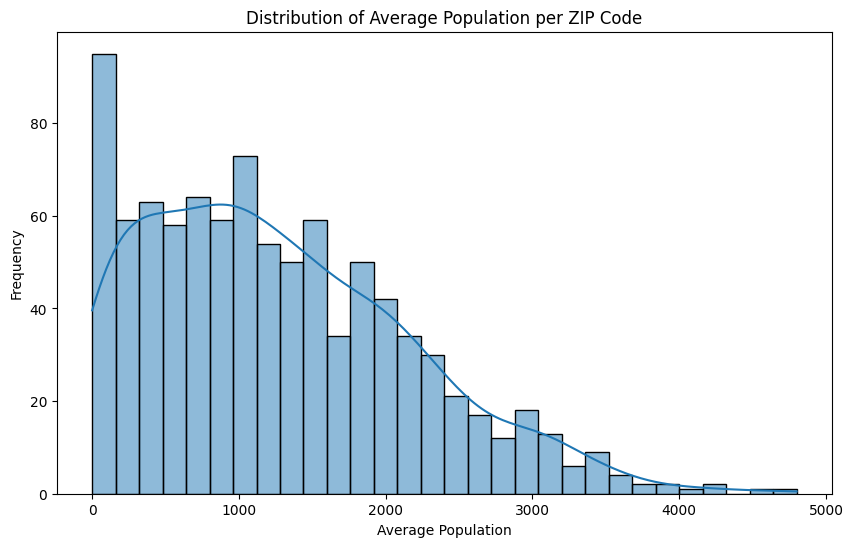

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of avg_population
plt.figure(figsize=(10, 6))
sns.histplot(analysis["population"], bins=30, kde=True)
plt.title("Distribution of Average Population per ZIP Code")
plt.xlabel("Average Population")
plt.ylabel("Frequency")
plt.show()

In [ ]:
from scipy.stats import f_oneway

# Group the data by density category
grouped_ratings = [analysis.loc[analysis["density_category"] == label, "avg_rating"] for label in labels]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*grouped_ratings)

print("ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")

print("Result: There is a significant difference in average ratings between density categories becuase of the p-value being below .05")

ANOVA Results:
F-statistic: 3.7978, p-value: 0.0101
Result: There is a significant difference in average ratings between density categories becuase of the p-value being below .05


In [ ]:
from scipy.stats import spearmanr

# Perform Spearman's correlation test
correlation, p_value = spearmanr(analysis["competition"], analysis["avg_rating"])

print("Spearman Correlation Test Results:")
print(f"Spearman Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

print("Result: There is no significant correlation between competition and average ratings because the p-value is greater that .05")


Spearman Correlation Test Results:
Spearman Correlation Coefficient: 0.0274
P-value: 0.4024
Result: There is no significant correlation between competition and average ratings because the p-value is greater that .05
